In [38]:
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy import fftpack

read:belevskaya_06_su.wav
(11025,)


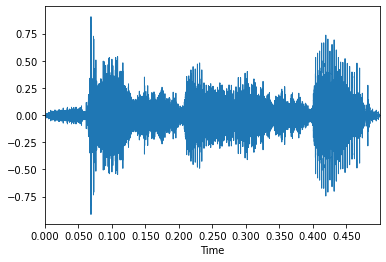

read:belevskaya_07_su.wav
(46857,)


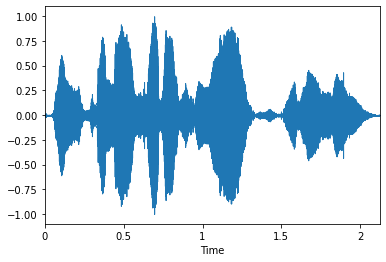

read:belevskaya_b01.wav
(132300,)


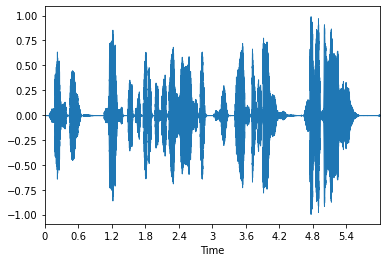

read:belevskaya_b02.wav
(77175,)


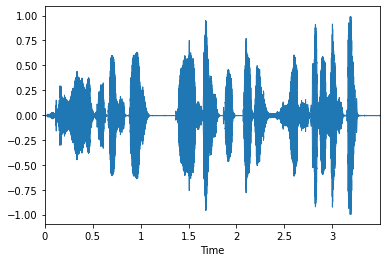

read:belevskaya_b03.wav
(11025,)


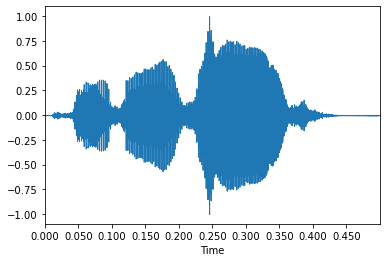

read:belevskaya_b04.wav
(66150,)


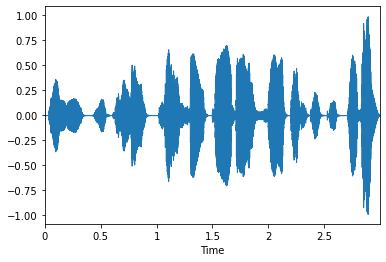

read:belevskaya_b05.wav
(56147,)


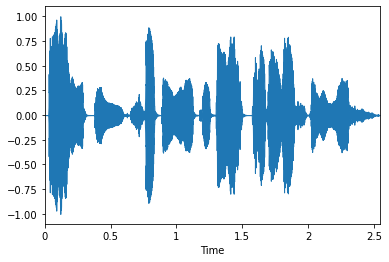

read:belevskaya_b06.wav
(11784,)


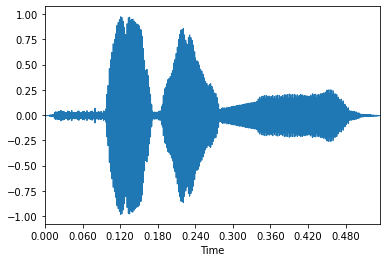

read:belevskaya_b07.wav
(55125,)


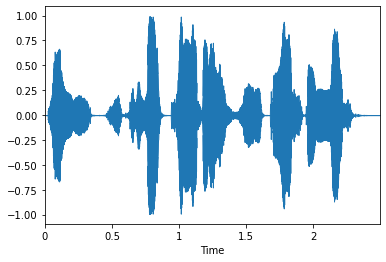

read:belevskaya_b08_su.wav
(33075,)


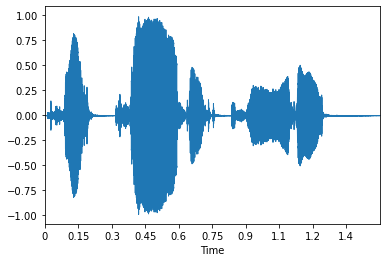

read:belevskaya_b09_su.wav
(16538,)


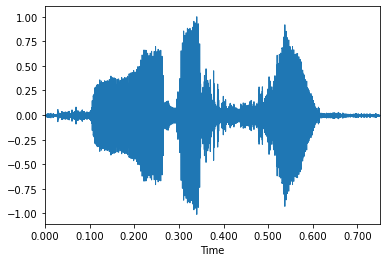

read:belevskaya_b10.wav
(12553,)


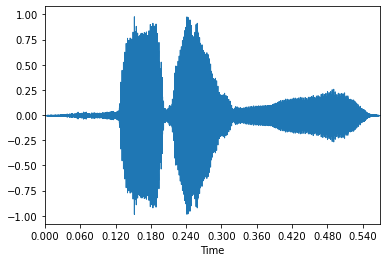

read:belevskaya_b11.wav
(56468,)


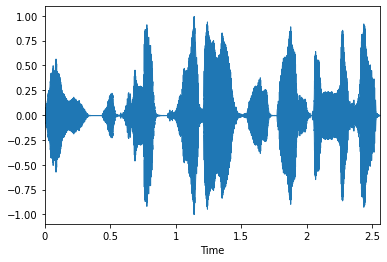

read:belevskaya_b12.wav
(12297,)


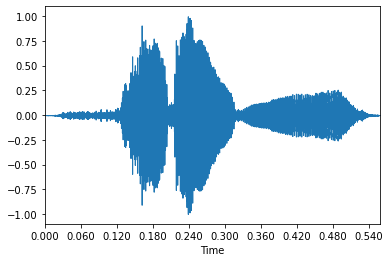

read:belevskaya_b13.wav
(63394,)


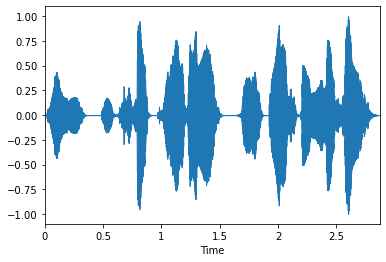

read:belevskaya_b14.wav
(79932,)


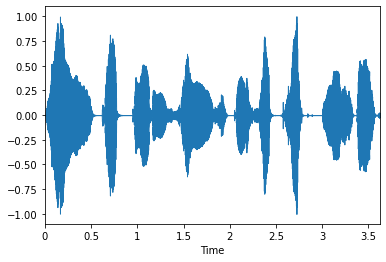

read:belevskaya_b15.wav
(67423,)


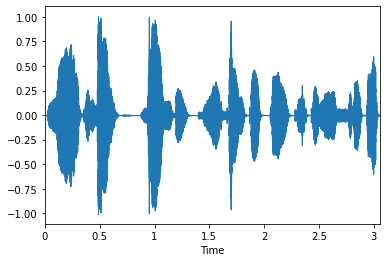

read:belevskaya_b16.wav
(66150,)


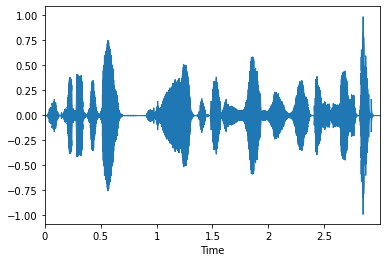

read:belevskaya_b17.wav
(11025,)


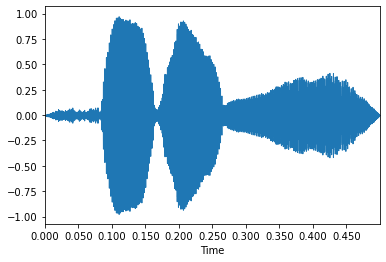

read:kirishima_04_su.wav
(22050,)


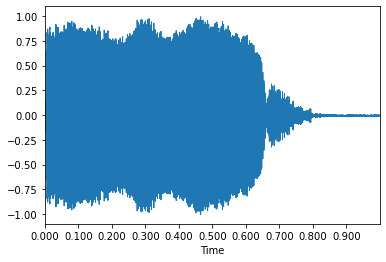

read:kirishima_b01.wav
(132300,)


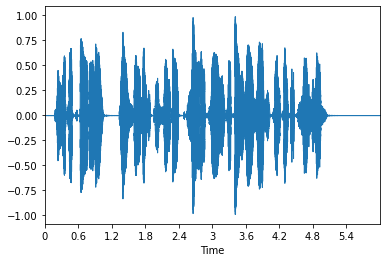

read:kirishima_b02_su.wav
(66150,)


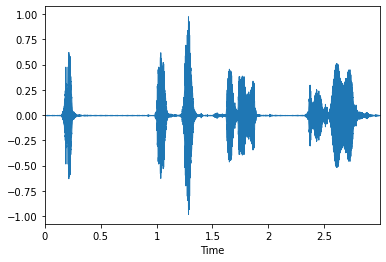

read:kirishima_b03.wav
(50927,)


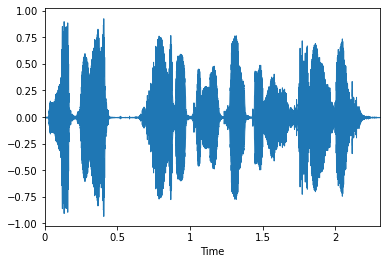

read:kirishima_b04.wav
(27563,)


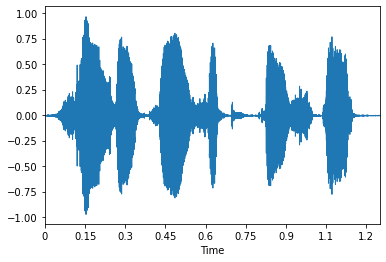

read:kirishima_b05.wav
(33075,)


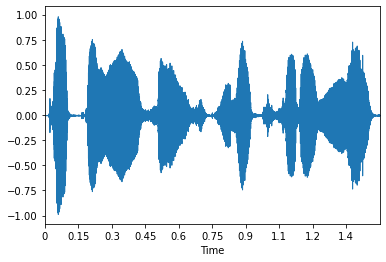

read:kirishima_b06.wav
(28308,)


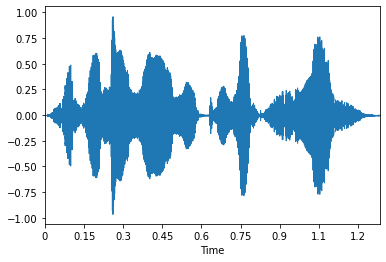

read:kirishima_b07.wav
(11025,)


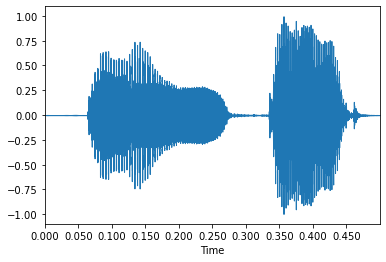

read:kirishima_c01.wav
(21995,)


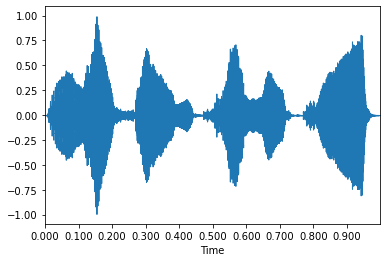

read:kirishima_c02.wav
(24353,)


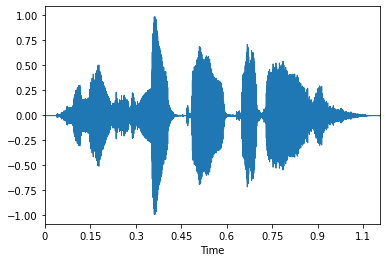

read:kirishima_c03.wav
(19294,)


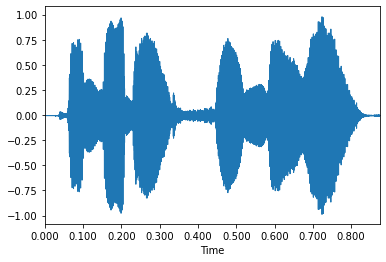

read:kirishima_c04.wav
(39966,)


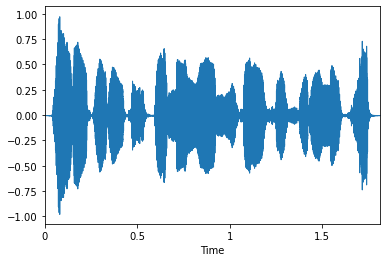

read:kirishima_c05.wav
(31697,)


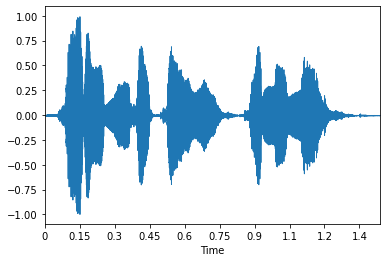

read:kirishima_c06.wav
(60638,)


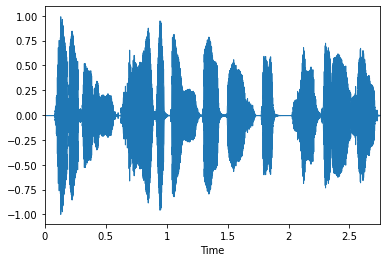

read:kirishima_c07.wav
(8269,)


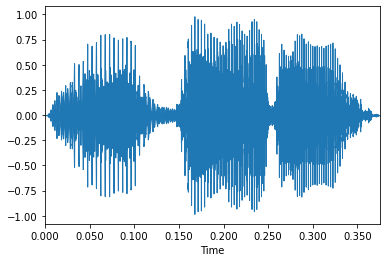

read:kirishima_c08.wav
(6263,)


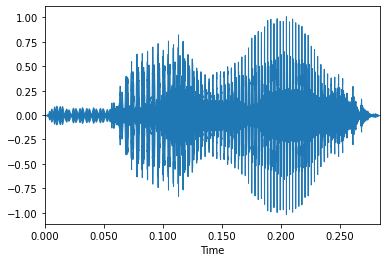

read:kirishima_c09.wav
(16538,)


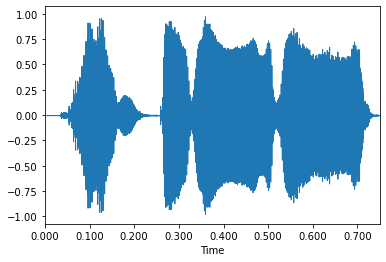

read:suzutsuki_b01.wav
(15038,)


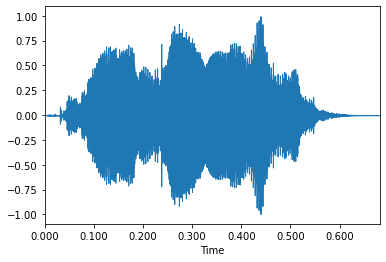

read:suzutsuki_b02.wav
(33075,)


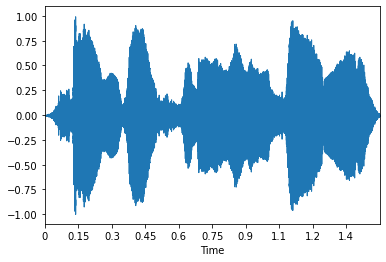

read:suzutsuki_b03.wav
(55125,)


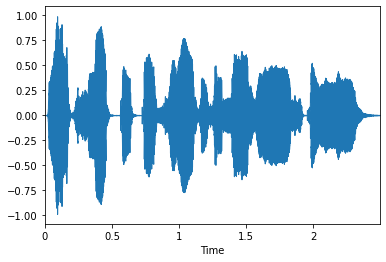

read:suzutsuki_b04.wav
(20672,)


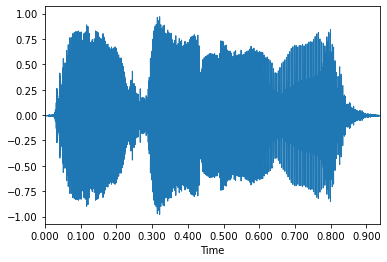

read:suzutsuki_b05.wav
(24504,)


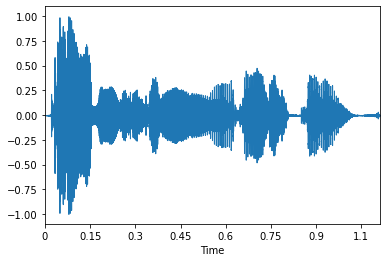

read:suzutsuki_b06.wav
(66150,)


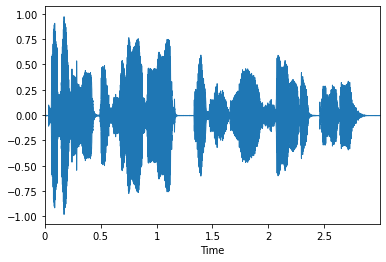

read:suzutsuki_b07.wav
(66150,)


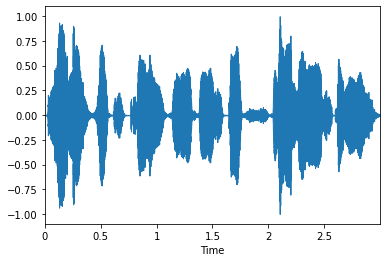

read:suzutsuki_b08.wav
(11025,)


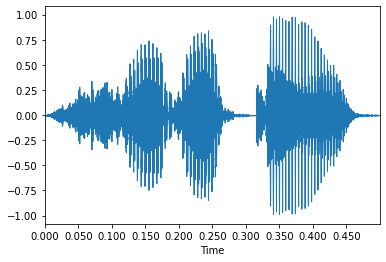

read:suzutsuki_b09.wav
(52369,)


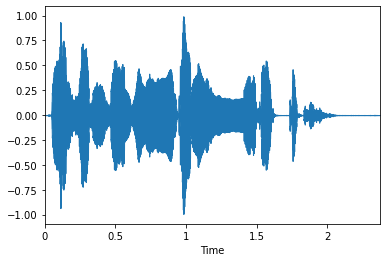

read:suzutsuki_b10.wav
(71663,)


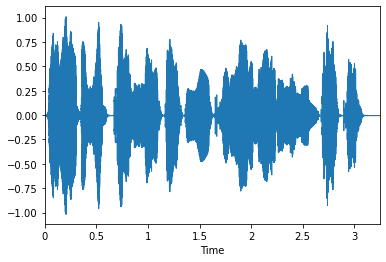

read:suzutsuki_b11.wav
(51237,)


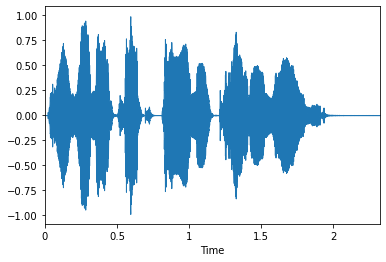

read:suzutsuki_b12.wav
(13719,)


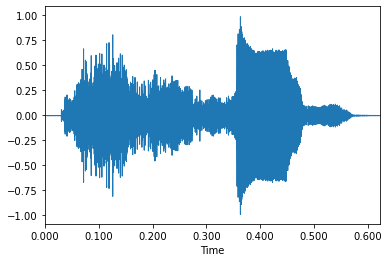

In [4]:
# 音声データを読み込む
dir_name = 'voiceset'
for file_name in sorted(os.listdir(path = dir_name)):
    print("read:{}".format(file_name))
    a, sr = librosa.load(os.path.join(dir_name, file_name))
    print(a.shape)
    librosa.display.waveplot(a,sr)
    plt.show()

In [25]:
# 音声データを読み込む
speakers = {'kirishima':0, 'suzutsuki':1,'belevskaya':2}

# 特徴量を返す
def get_feat(file_name):
    a,sr = librosa.load(file_name)
    y = np.abs(librosa.stft(a))
    plt.figure(figsize =(10,4))
    librosa.display.specshow(librosda.amplitude_to_db(y, ref = np.max), y_axis = 'log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    return y
# 特徴量と分類のラベル済みのラベルの組みを返す
def get_data(dir):
    data_X = []
    data_y = []
    for file_name in sorted(os.listdir(path = dir_name)):
        print("read:{}".format(file_name))
        speaker = file_name[0:file_name.index('_')]
        data_X.append(get_feat(os.path.join(dir_name, file_name)))
        data_y.append((speakers[speaker],file_name))
    
    return(np.array(data_X),np.array(data_y))
    
data_X, data_y = get_data('voiceset')
#get_feat('sample/hi.wav')
#get_feat('sample/lo.wav')


read:belevskaya_06_su.wav
read:belevskaya_07_su.wav
read:belevskaya_b01.wav
read:belevskaya_b02.wav
read:belevskaya_b03.wav
read:belevskaya_b04.wav
read:belevskaya_b05.wav
read:belevskaya_b06.wav
read:belevskaya_b07.wav
read:belevskaya_b08_su.wav
read:belevskaya_b09_su.wav
read:belevskaya_b10.wav
read:belevskaya_b11.wav
read:belevskaya_b12.wav
read:belevskaya_b13.wav
read:belevskaya_b14.wav
read:belevskaya_b15.wav
read:belevskaya_b16.wav
read:belevskaya_b17.wav
read:kirishima_04_su.wav
read:kirishima_b01.wav
read:kirishima_b02_su.wav
read:kirishima_b03.wav
read:kirishima_b04.wav
read:kirishima_b05.wav
read:kirishima_b06.wav
read:kirishima_b07.wav
read:kirishima_c01.wav
read:kirishima_c02.wav
read:kirishima_c03.wav
read:kirishima_c04.wav
read:kirishima_c05.wav
read:kirishima_c06.wav
read:kirishima_c07.wav
read:kirishima_c08.wav
read:kirishima_c09.wav
read:suzutsuki_b01.wav
read:suzutsuki_b02.wav
read:suzutsuki_b03.wav
read:suzutsuki_b04.wav
read:suzutsuki_b05.wav
read:suzutsuki_b06.wav


In [34]:
# 教師データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, random_state=813)
print("{} -> {},{}".format(len(data_X),len(train_X),len(test_X)))

48 -> 36,12


In [35]:
# clf = svm.SVC(gamma = 0.01, C=1)
clf = svm.SVC(gamma = 0.0000001, C=10)
clf.fit(train_X, train_y.T[0])

SVC(C=10, gamma=1e-07)

In [36]:
clf.predict(np.array([test_X[0]]))

array(['2'], dtype='<U21')

In [37]:
ok_count = 0

for X,y in zip(test_X, test_y):
    actual = clf.predict(np.array([X]))[0]
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file:{}, actual: {}, expected:{}".format(result, file_name, actual, expected))

    print("{}/{}".format(ok_count, len(test_X)))

o file:belevskaya_b11.wav, actual: 2, expected:2
1/12
o file:kirishima_c01.wav, actual: 0, expected:0
2/12
x file:kirishima_c09.wav, actual: 2, expected:0
2/12
x file:kirishima_04_su.wav, actual: 2, expected:0
2/12
o file:belevskaya_b14.wav, actual: 2, expected:2
3/12
o file:kirishima_b07.wav, actual: 0, expected:0
4/12
x file:suzutsuki_b06.wav, actual: 2, expected:1
4/12
x file:kirishima_c02.wav, actual: 2, expected:0
4/12
o file:kirishima_b03.wav, actual: 0, expected:0
5/12
o file:suzutsuki_b08.wav, actual: 1, expected:1
6/12
o file:suzutsuki_b02.wav, actual: 1, expected:1
7/12
o file:kirishima_b05.wav, actual: 0, expected:0
8/12
